# **EDA_Wine Quality Data**
# **By Amit Kharche**
**Follow me** on [Linkedin](https://www.linkedin.com/in/amit-kharche) and [Medium](https://medium.com/@amitkharche14) for more insights on **Data Science** and **Artificial intelligence (AI)**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.3** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - [**8.1. What is the distribution of wine quality ratings?**](#section81)<br>
  - [**8.2. What is the distribution of alcohol content in the wines?**](#section82)<br>
  - [**8.3. How does alcohol content relate to wine quality?**](#section83)<br>
  - [**8.4. What are the average values of features across different wine quality levels?**](#section84)<br>
  - [**8.5. What is the correlation between different numerical features?**](#section85)<br>
  - [**8.6. What is the density of wine quality vs. alcohol content?**](#section86)<br>
  - [**8.7. How does volatile acidity impact wine quality?**](#section87)<br>
  - [**8.8. What are the top features that influence quality (based on correlation)?**](#section88)<br>
  - [**8.9. What is the relationship between residual sugar, density, and quality?**](#section89)<br>
  - [**8.10. What is the distribution of wine samples by pH levels and quality?**](#section810)<br>
  - [**8.11. How does fixed acidity relate to citric acid and quality?**](#section811)<br>
  - [**8.12. What are the top 5 most acidic wines and their quality scores?**](#section812)<br>
  - [**8.13. How does sulphate concentration vary with quality?**](#section813)<br>
  - [**8.14. Which two features best separate high-quality wines (pair plot)?**](#section814)<br>
  - [**8.15. Visualize feature importance using a decision tree**](#section815)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section9.1)<br>
  - **9.2** [**Actionable Insights***](#Section9.1)<br>

---
<a name = Section1></a>
# **1. Introduction**
---
The **Wine Quality dataset** contains detailed physicochemical characteristics and corresponding **quality ratings** for a variety of **Portuguese "Vinho Verde" red and white wines**.
Each sample is described by attributes such as **fixed acidity**, **volatile acidity**, **citric acid**, **residual sugar**, **chlorides**, **free sulfur dioxide**, **total sulfur dioxide**, **density**, **pH**, **sulphates**, and **alcohol**.
The target variable, **quality**, is a score between 0 and 10 reflecting **sensory evaluations** conducted by wine experts.
This dataset provides a rich foundation for **Exploratory Data Analysis (EDA)** to understand the **distribution**, **variation**, and **interrelationships** among features that influence wine quality.
EDA helps identify **patterns**, **correlations**, and **outliers** in the data, which are vital for building robust **predictive models**.
This analysis is not only crucial for **machine learning applications**, but also offers practical insights to **winemakers**, **quality controllers**, and **industry stakeholders** aiming to optimize the wine production process.

---

---
<a name = Section2></a>
# **2. Problem Statement**
---
This project aims to conduct a comprehensive **Exploratory Data Analysis (EDA)** of the **Wine Quality dataset** to uncover significant relationships between **physicochemical properties** and the **sensory-based quality rating**. By analyzing key features such as **acidity levels**, **sugar content**, **alcohol concentration**, and **sulphate presence**, we aim to answer the following questions:

* What are the most **important attributes** affecting wine quality?
* How are different **features distributed** and how do they **interact**?
* Are there any **anomalies or outliers** that skew the data?
* Can we observe **correlation patterns** that suggest quality improvements?
  This EDA will utilize visual tools like **histograms**, **box plots**, **pair plots**, and **correlation heatmaps** to derive **data-driven insights**. The findings will support future efforts in **feature selection**, **predictive modeling**, and can assist **winemakers** in refining production techniques for higher-quality wines.

---
<center><img style="width:80%; height:300px" src="https://raw.githubusercontent.com/insaid2018/Term-2/master/wine%20gif%20term%201%20%26%20Term%202.gif"  height="300" width="">

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install ydata_profiling

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section33></a>
### **3.3 Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                        # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import matplotlib.pyplot as plt                 # Importing pyplot interface of matplotlib
import seaborn as sns                           # Importing seaborn library for interactive visualization
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

### **Dataset Overview**

This section provides an overview of the dataset used to analyze factors that influence **wine quality** based on its **physicochemical characteristics**.

The data is sourced from a compilation of **Portuguese "Vinho Verde" wines**, including both **red and white variants**, and consists of multiple **physicochemical test results** for each wine sample. Each row in the dataset corresponds to a **unique wine observation**, along with its **quality rating** assigned by **sensory experts** on a scale from 0 to 10.

The dataset is ideal for **univariate**, **bivariate**, and **multivariate analyses**, allowing us to explore **statistical distributions**, **correlations**, and **patterns** between chemical components and **perceived wine quality**. It is especially valuable for developing **predictive models** and providing **data-driven insights** to **winemakers** for improving wine characteristics.

---

### **Feature Description**

| Id | Feature                | Description                                                                      |
| -- | :--------------------- | :------------------------------------------------------------------------------- |
| 01 | `fixed acidity`        | Tartaric acid level; contributes to the wine's acidity and flavor stability      |
| 02 | `volatile acidity`     | Acetic acid level; high levels lead to an unpleasant vinegar taste               |
| 03 | `citric acid`          | Adds freshness and flavor; low levels can make wine taste flat                   |
| 04 | `residual sugar`       | Remaining sugar after fermentation; affects sweetness                            |
| 05 | `chlorides`            | Salt content; affects wine taste                                                 |
| 06 | `free sulfur dioxide`  | Helps prevent microbial growth and oxidation                                     |
| 07 | `total sulfur dioxide` | Sum of free and bound forms; excessive levels can affect taste                   |
| 08 | `density`              | Affected by sugar and alcohol content; higher density usually means sweeter wine |
| 09 | `pH`                   | Inversely related to acidity; lower pH means more acidic                         |
| 10 | `sulphates`            | Adds to wine's antimicrobial and antioxidant properties                          |
| 11 | `alcohol`              | Ethanol content by volume; typically correlates with perceived quality           |
| 12 | `quality`              | Score (0–10) representing the wine’s sensory quality rating                      |

---

* **No categorical features** are present; all attributes are **numerical**, enabling seamless statistical analysis and machine learning modeling.
* There are **no missing values**, making this dataset ready for immediate **EDA and modeling**.
* The dataset supports in-depth analysis of **how chemical properties influence quality**, identification of **key quality indicators**, and exploration of **feature interactions**.
* It also allows for **clustering**, **correlation studies**, and **predictive modeling** to guide **quality optimization** in wine production.

---

In [2]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_Wine_Quality_Data_amit_kharche/winequality.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id=section301></a>
### Data Description

* Dataset has __1000 rows__ and __12 columns__.

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


### **Data Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


**Observation**

* The dataset consists of **6497 entries** and **12 columns**, capturing various **physicochemical properties** of wines along with their **quality rating**.
* All columns are **complete with no missing values**, ensuring smooth execution of **EDA and modeling tasks** without the need for imputation.
* The dataset is predominantly **numerical**, with **11 features as float64** and **1 categorical-like target (`quality`) as int64**, making it suitable for **regression and classification tasks**.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- Here, we will perform **Pandas Profiling before preprocessing** our dataset

- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [5]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Pre_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 382.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section6></a>
# **6. Data Cleaning**
---

In [6]:
# Check for null values in each column
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Check and remove duplicate rows if any
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Duplicate rows: 1179


In [8]:
# Display data types of each column
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5318.0,7.215523,1.319777,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5318.0,0.344171,0.168264,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5318.0,0.318522,0.147177,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5318.0,5.049605,4.500645,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5318.0,0.056700,0.036865,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5318.0,30.030463,17.804365,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5318.0,114.107747,56.783848,6.00000,74.0000,116.00000,153.75000,440.00000
density,5318.0,0.994536,0.002966,0.98711,0.9922,0.99466,0.99677,1.03898
pH,5318.0,3.224639,0.160403,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5318.0,0.533402,0.149753,0.22000,0.4300,0.51000,0.60000,2.00000


<a id=section7></a>
---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

####  Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset.

In [10]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Post_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 258.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a id=section81></a>
**8.1. What is the distribution of wine quality ratings?**

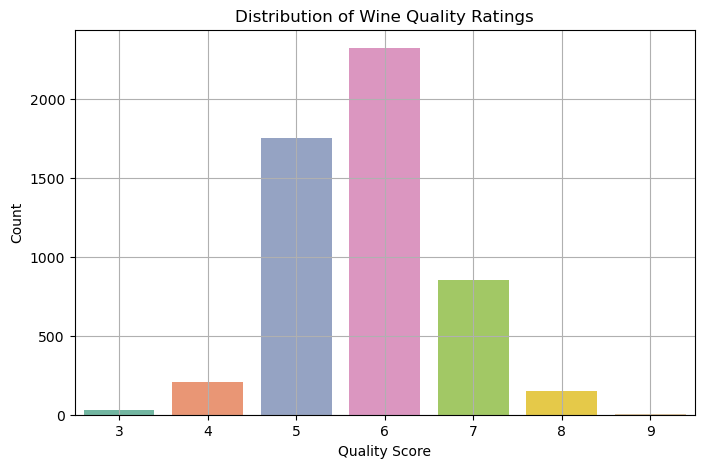

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, palette='Set2')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Observation:

* The majority of wines are rated with a **quality score of 6**, followed by **5**, indicating that most wines fall into the **average quality** category.
* Very few wines achieve **high scores (8 or above)**, suggesting **limited representation of premium quality wines** in the dataset.
* **Low quality scores (3–4)** are also **relatively rare**, showing that **extremely poor-quality wines are uncommon** in this dataset.

<a id=section82></a>
**8.2. What is the distribution of alcohol content in the wines?**

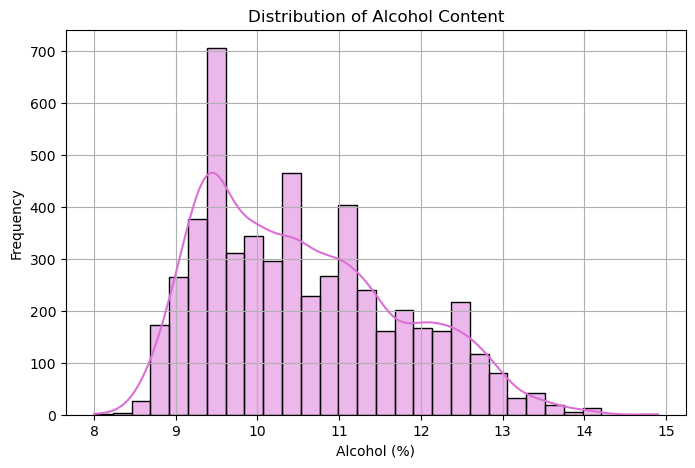

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data['alcohol'], kde=True, bins=30, color='orchid')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Observation:

* The **alcohol content** in wines predominantly ranges between **9% and 12%**, with a noticeable **peak around 9.5%**.
* The distribution is **right-skewed**, indicating that **fewer wines** have very **high alcohol levels** above 13%.
* The curve suggests a **normal-like distribution** with a **long tail**, which may influence wine quality in the upper alcohol ranges.

<a id=section83></a>
**8.3. How does alcohol content relate to wine quality?**

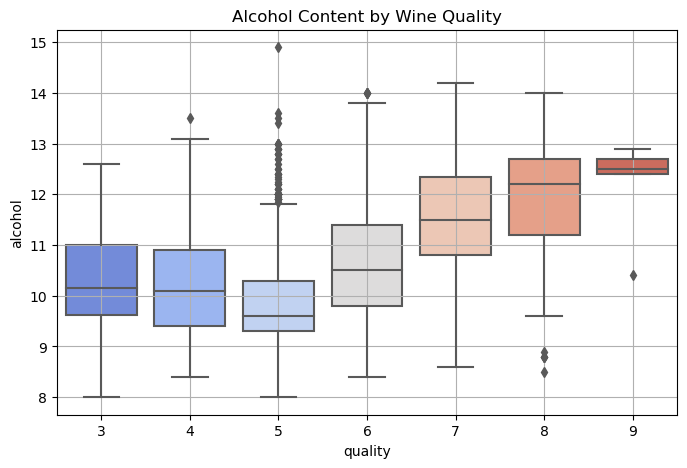

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=data, palette='coolwarm')
plt.title('Alcohol Content by Wine Quality')
plt.grid(True)
plt.show()

### Observation:
* Wines with **higher quality scores** (7 to 9) generally have **higher median alcohol content**, indicating a **positive correlation** between **alcohol level** and **wine quality**.
* **Lower quality wines** (scores 3 to 5) tend to have **lower alcohol content** and wider variability, suggesting **less consistency** in alcohol levels.
* The **tight interquartile range** for quality 9 wines reflects **high consistency** in alcohol levels among **top-rated wines**.

<a id=section84></a>
**8.4. What are the average values of features across different wine quality levels?**

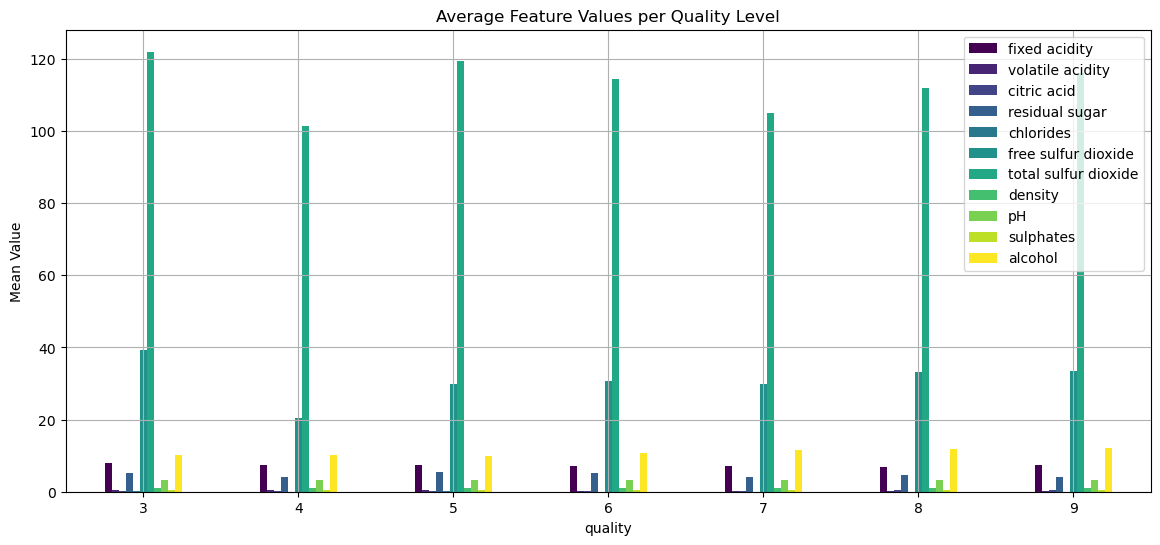

In [14]:
data.groupby('quality').mean().plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title('Average Feature Values per Quality Level')
plt.ylabel('Mean Value')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

### Observation:
* **Alcohol** and **sulphates** show a **consistent increase** with rising wine quality, indicating their **positive influence** on better-rated wines.
* **Volatile acidity** and **chlorides** exhibit a **declining trend** with higher quality scores, suggesting they **negatively affect** wine quality.
* Other features such as **residual sugar**, **citric acid**, and **density** remain relatively **stable across quality levels**, showing **less direct impact** on quality.

<a id=section85></a>
**8.5. What is the correlation between different numerical features?**

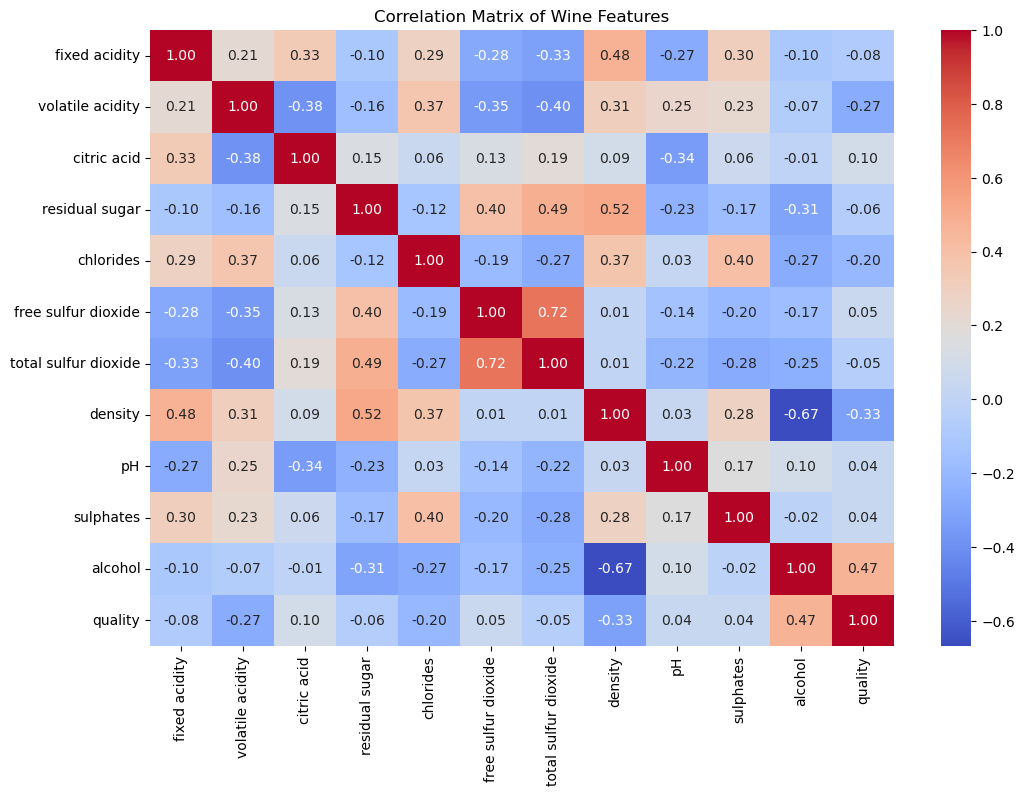

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

### Observation:
* **Alcohol** shows the **strongest positive correlation** with **wine quality** (**0.47**), indicating it is a key driver of higher ratings.
* **Volatile acidity** has a **notable negative correlation** with quality (**-0.27**), suggesting higher acidity is associated with **lower-rated wines**.
* Features like **sulphates** (0.04), **citric acid** (0.10), and **density** (-0.33) show **weaker or inconsistent correlations**, implying a **more complex influence** on wine quality.

<a id=section86></a>
**8.6. What is the density of wine quality vs. alcohol content (KDE plot)?**

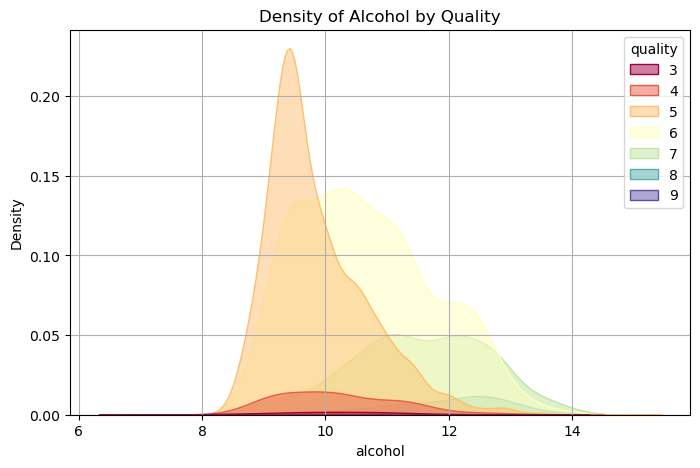

In [16]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='alcohol', hue='quality', fill=True, palette='Spectral', alpha=0.5)
plt.title('Density of Alcohol by Quality')
plt.grid(True)
plt.show()

### Observation:
* **Higher quality wines (7–9)** tend to have **higher alcohol concentrations**, with their **density curves peaking around 12–13% alcohol**.
* In contrast, **lower quality wines (3–5)** are concentrated in the **9–10% alcohol range**, indicating a **lower alcohol profile**.
* The **progressive shift to the right** across quality levels confirms a **positive relationship between alcohol content and wine quality**.


<a id=section87></a>
**8.7. How does volatile acidity impact wine quality?**

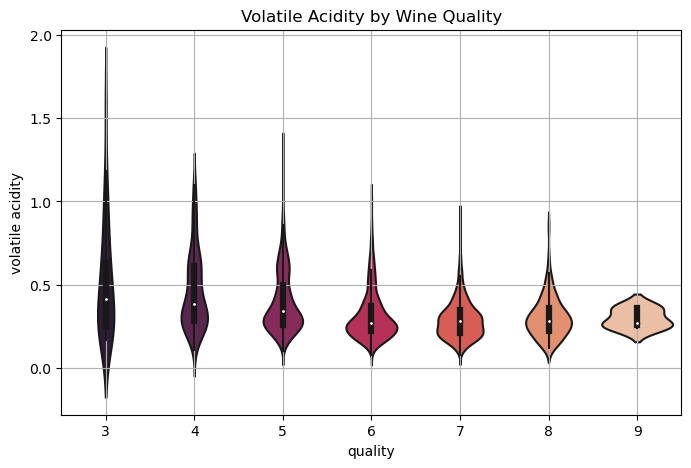

In [17]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='quality', y='volatile acidity', data=data, palette='rocket')
plt.title('Volatile Acidity by Wine Quality')
plt.grid(True)
plt.show()

### Observation:
* **Volatile acidity** shows a **clear decreasing trend** as **wine quality increases**, indicating that **lower volatile acidity** is associated with **better-rated wines**.
* **Lower quality wines (3–5)** exhibit a **wider and higher spread** of volatile acidity values, suggesting **greater inconsistency**.
* **High-quality wines (8–9)** have **tightly concentrated** and **lower volatile acidity**, reinforcing its role as a **negative indicator of wine quality**.

<a id=section88></a>
**8.8. What are the top features that influence quality (based on correlation)?**

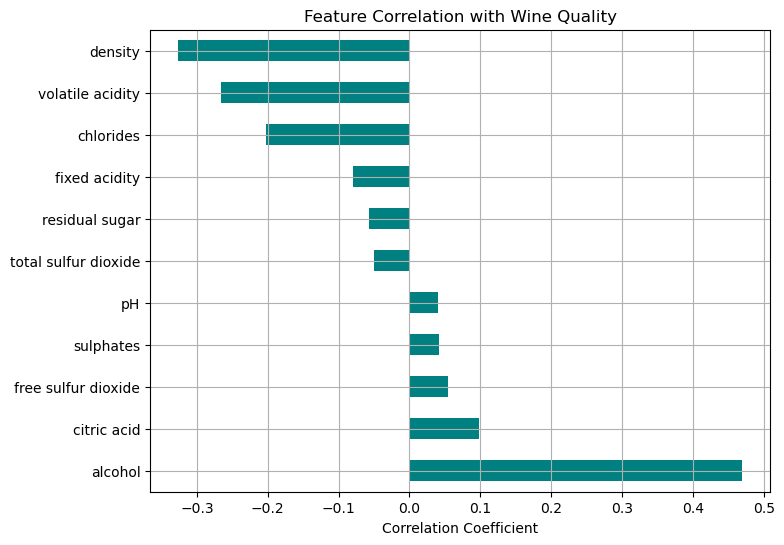

In [18]:
correlation = data.corr()['quality'].drop('quality').sort_values(ascending=False)
correlation.plot(kind='barh', figsize=(8, 6), color='teal')
plt.title('Feature Correlation with Wine Quality')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()

### Observation:
* **Alcohol** has the **strongest positive correlation (0.47)** with **wine quality**, making it the most influential predictor.
* **Volatile acidity**, **density**, and **chlorides** show **moderate negative correlations**, suggesting their **reduction could enhance wine quality**.
* Other features like **citric acid** and **sulphates** show **weak positive correlations**, indicating a **limited but supportive role** in determining quality.


<a id=section89></a>
**8.9. What is the relationship between residual sugar, density, and quality?**

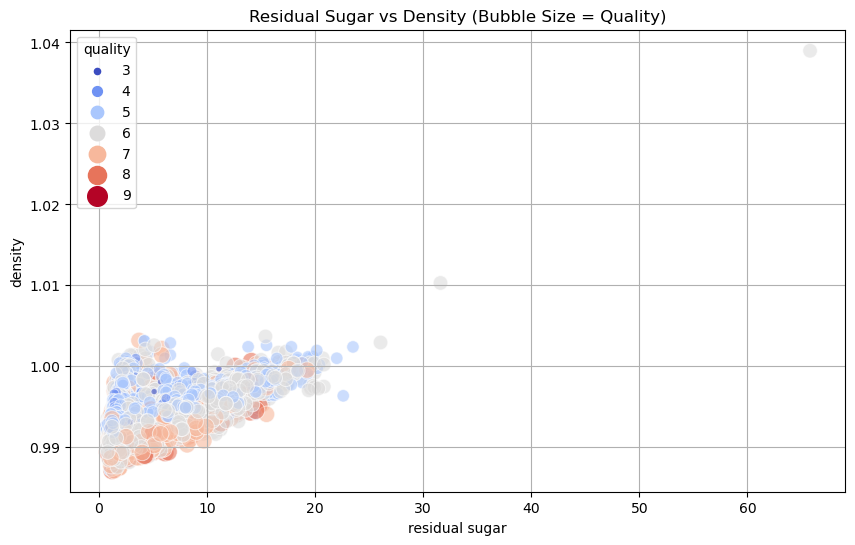

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='density', size='quality', hue='quality',
                data=data, sizes=(20, 200), palette='coolwarm', alpha=0.6)
plt.title('Residual Sugar vs Density (Bubble Size = Quality)')
plt.grid(True)
plt.show()

### Observation:
* **Residual sugar** and **density** exhibit a **positive relationship**, with higher sugar levels generally resulting in **increased density**.
* Most wines, especially those with **higher quality (7–9)**, are clustered in the **low sugar and low density** range, suggesting **balance is preferred**.
* Wines with **very high residual sugar and density** are rare and do not show a **clear association with higher quality**, indicating **limited benefit** of excess sweetness.


<a id=section810></a>
**8.10. What is the distribution of wine samples by pH levels and quality?**

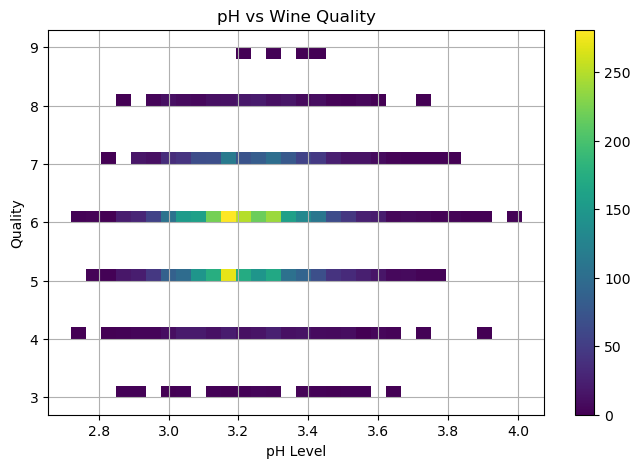

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='pH', y='quality', bins=30, cmap='viridis', cbar=True)
plt.title('pH vs Wine Quality')
plt.xlabel('pH Level')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

### Observation:

* Most wines are concentrated within the **pH range of 3.1 to 3.4**, especially those rated with **quality scores of 5 and 6**, indicating a **neutral to slightly acidic profile** is common.
* **Higher quality wines (7–9)** do not show a distinct pH preference, suggesting **pH alone is not a strong differentiator** for premium wines.
* The heatmap shows **no clear linear pattern** between **pH levels and wine quality**, implying that pH has a **minimal or indirect influence** on perceived wine quality.


<a id=section811></a>
**8.11. How does fixed acidity relate to citric acid and quality?**

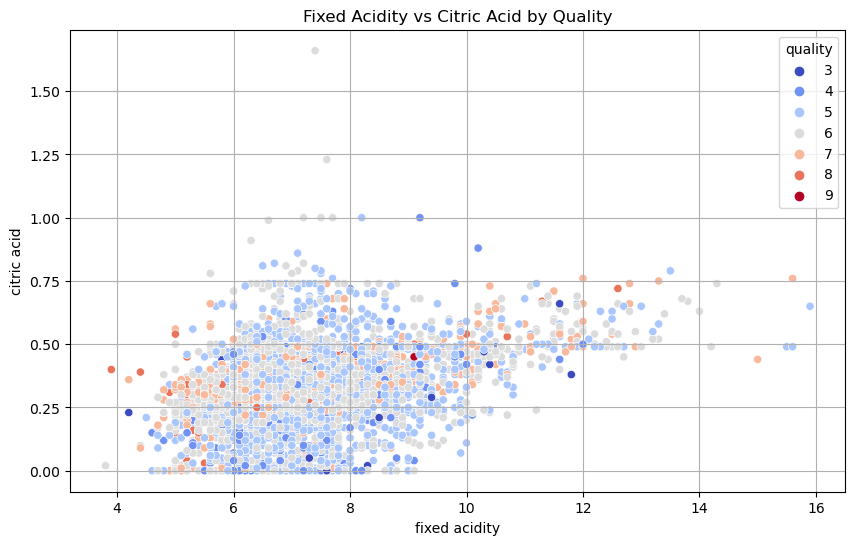

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='fixed acidity', y='citric acid', hue='quality', palette='coolwarm')
plt.title('Fixed Acidity vs Citric Acid by Quality')
plt.grid(True)
plt.show()

### Observation:
* **Fixed acidity** and **citric acid** show a **moderate positive correlation**, indicating that wines with higher fixed acidity tend to have more citric acid.
* **Higher quality wines (7–9)** are mostly concentrated in the **mid to upper range** of both acids, suggesting a **balanced acidic profile contributes to better ratings**.
* **Lower quality wines (3–5)** are more dispersed and appear frequently at **low citric acid levels**, reflecting **less favorable acidity composition**.


<a id=section812></a>
**8.12. What are the top 5 most acidic wines and their quality scores?**

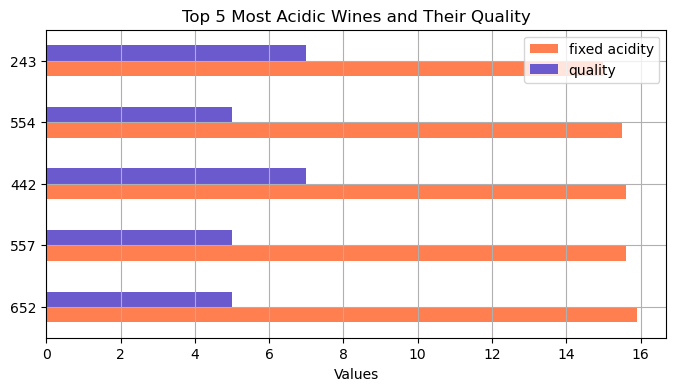

In [22]:
top_acidic = data.sort_values(by='fixed acidity', ascending=False).head(5)
top_acidic[['fixed acidity', 'quality']].plot(kind='barh', color=['coral', 'slateblue'], figsize=(8, 4))
plt.title('Top 5 Most Acidic Wines and Their Quality')
plt.xlabel('Values')
plt.grid(True)
plt.show()

### Observation:

* The **top 5 most acidic wines** have **fixed acidity values above 15**, indicating extremely **high acid concentration** compared to the rest of the dataset.
* Despite high acidity, their **quality scores range from 5 to 7**, showing that **high acidity alone does not guarantee superior wine quality**.
* This suggests that **wine quality depends on a balanced composition**, and **extreme acidity may not be favorable** without other supporting attributes.


<a id=section813></a>
**8.13. How does sulphate concentration vary with quality?**

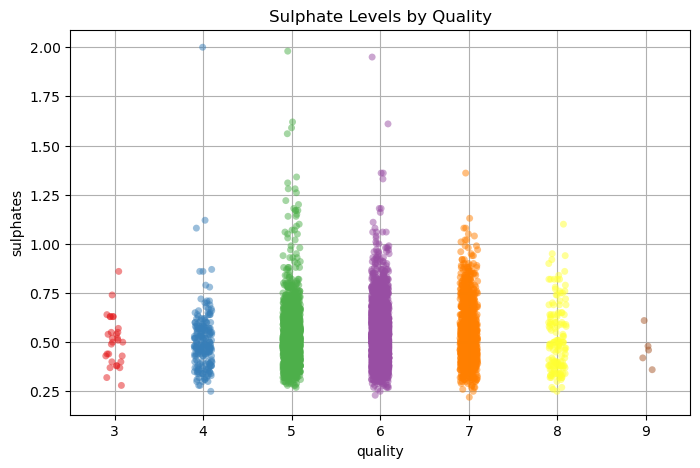

In [23]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='quality', y='sulphates', data=data, palette='Set1', jitter=True, alpha=0.5)
plt.title('Sulphate Levels by Quality')
plt.grid(True)
plt.show()

### Observation
* **Sulphate levels** tend to be **higher and more varied** in wines with **quality scores between 5 and 7**, indicating their **potential contribution to wine preservation and taste**.
* **Lower quality wines (3–4)** generally have **lower sulphate concentrations**, suggesting a possible link between **sulphate deficiency and poor quality**.
* **High-quality wines (8–9)** show **moderate sulphate levels**, implying that **balanced sulphate content**, rather than extremes, is associated with better wine quality.

<a id=section814></a>
**8.14. Which two features best separate high-quality wines?**

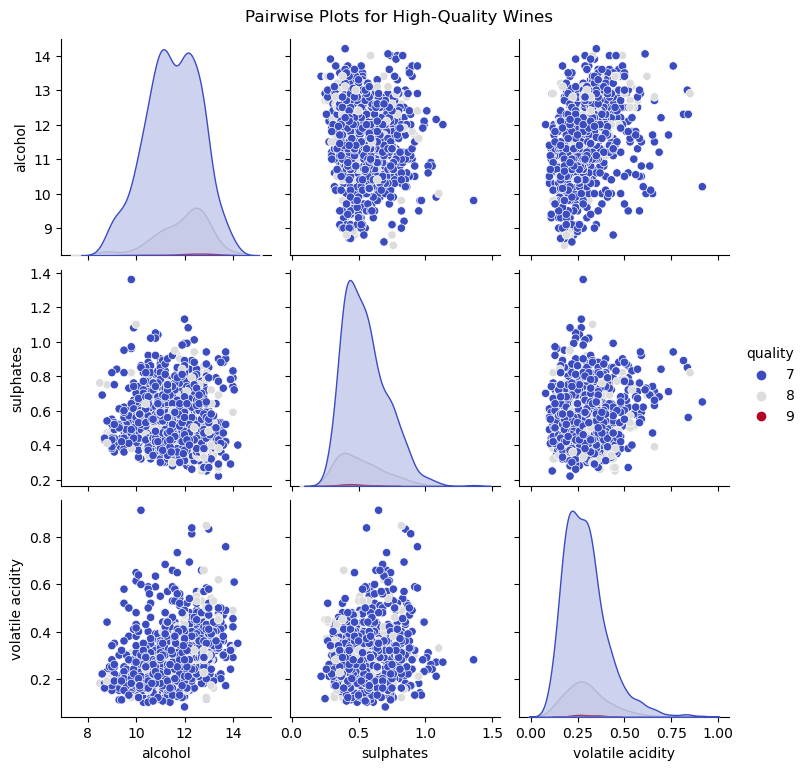

In [24]:
high_quality = data[data['quality'] >= 7]
sns.pairplot(high_quality[['alcohol', 'sulphates', 'volatile acidity', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Plots for High-Quality Wines', y=1.02)
plt.show()

### Observation:
* **High-quality wines (7–9)** cluster around **higher alcohol levels** and **moderate sulphate concentrations**, reinforcing their **positive impact on quality**.
* **Volatile acidity** is generally **low and tightly distributed**, suggesting that **reduced acidity is a consistent trait** among top-rated wines.
* The pairwise plots reveal **no strong linear relationships** among features, but the **concentration patterns** highlight **preferred chemical profiles** for high-quality wines.


<a id=section815></a>
**8.15. Visualize feature importance using a decision tree?**

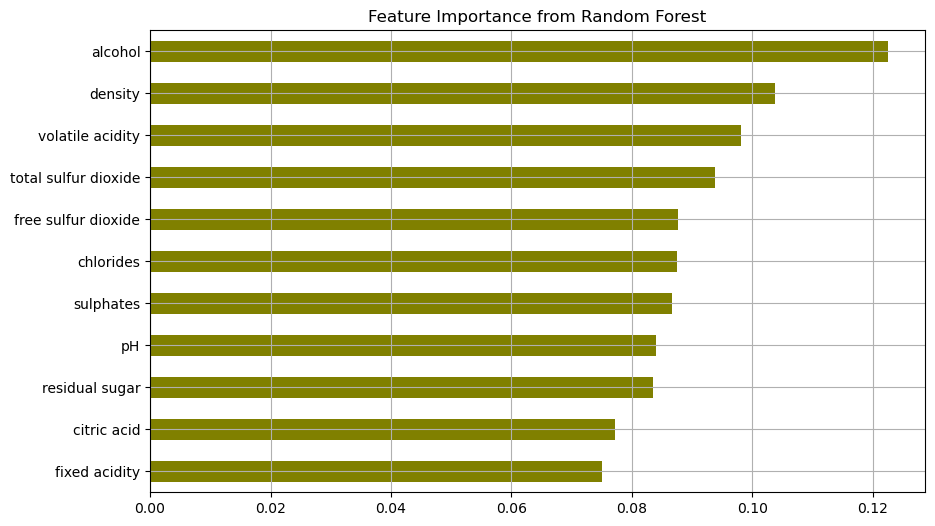

In [25]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('quality', axis=1)
y = data['quality']
model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), color='olive')
plt.title('Feature Importance from Random Forest')
plt.grid(True)
plt.show()

### Observation:
* **Alcohol** is identified as the **most important feature** for predicting wine quality, followed closely by **density** and **volatile acidity**, confirming their strong influence.
* Other significant contributors include **sulphates**, **total sulfur dioxide**, and **chlorides**, which collectively impact **preservation and taste**.
* Features like **citric acid** and **fixed acidity** have **lower importance**, suggesting they play a **less direct role** in determining wine quality compared to others.


---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section9.1></a>
### **9.1 Conclusion**

1. **Alcohol content** has the **strongest positive correlation** with wine quality, consistently appearing as the **top feature** in both correlation and feature importance analysis.
2. **Volatile acidity** is **negatively associated** with wine quality, with high levels commonly found in **lower-rated wines**, impacting taste negatively.
3. **Density and residual sugar** show a **positive relationship**, but do not correlate strongly with **high-quality wines**, indicating excess sweetness is not a key factor.
4. **Sulphates** and **citric acid** have a **moderate positive influence**, with better wines generally maintaining a **balanced acidic profile**.
5. **pH levels** show **no strong pattern** across quality ratings, implying that pH alone is not a reliable indicator of wine quality.
6. High-quality wines (7–9) share a **distinct cluster** with **higher alcohol**, **lower volatile acidity**, and **moderate sulphate levels**, suggesting a **preferred chemical signature**.

<a name = Section9.2></a>
### **9.2 Actionable Insights**

1. **Optimize alcohol content** during production to fall within the **12–13% range**, as it is closely linked with **higher quality perception**.
2. Implement strict control over **volatile acidity**, as lower levels are consistently found in **better-rated wines** and enhance **flavor stability**.
3. Focus on **balanced sulphate levels**, not extremes, to support wine preservation while maintaining **taste quality**.
4. Avoid excessive **residual sugar** and **high density**, as these do not contribute to **higher ratings** and may negatively affect mouthfeel.
5. Use **citric acid and fixed acidity** cautiously, maintaining moderate levels to support **flavor complexity** without over-acidifying the wine.
6. Leverage **predictive modeling** (e.g., **Random Forests**) using key features like **alcohol**, **volatile acidity**, and **density** to assess and improve wine quality **early in the production cycle**.